In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
synth = fits.open("0_lwsynth_525.0.fits")[0].data
synth_conv = fits.open("0_lwsynth_525.0_convolved.fits")[0].data
cubeM = mio.MuramIntensity("", 0)

RMS for simulation: 0.23475882732567044
RMS for LW: 0.2080254852771759


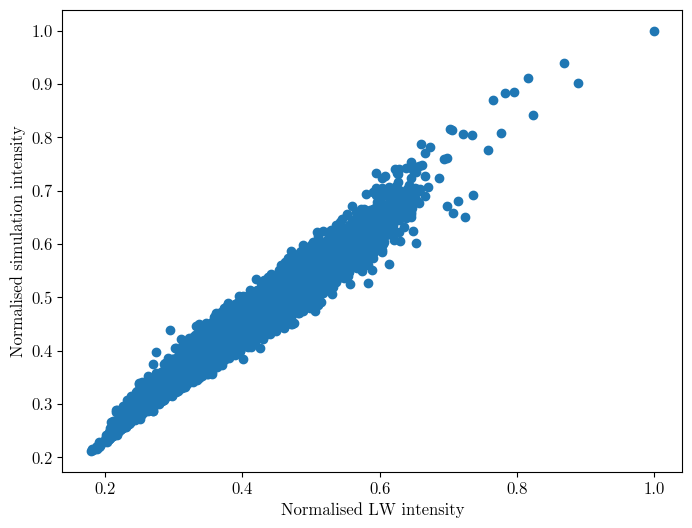

In [4]:
# Comparison of intensity taken from simulation and one that LW calculated
# Plotting normalized intensities + deriving RMS contrast
I1 = np.copy(synth[:,:,0,0])
I_M = cubeM[::2,::2]
I_M = I_M/np.max(I_M)
I1 = I1/np.max(I1)

fig = plt.figure(figsize = (8,6))
plt.scatter(I1,I_M)
plt.xlabel("Normalised LW intensity")
plt.ylabel("Normalised simulation intensity")
#plt.show()
plt.savefig("PoredjenjeInte.png", dpi = 300)

RMS_I1 = np.std(I1)/np.mean(I1)
print("RMS for simulation: {}".format(RMS_I1))

RMS_s = np.std(I_M)/np.mean(I_M)
print("RMS for LW: {}".format(RMS_s))

In [5]:
from astropy.io import fits
import sys
import os
from scipy.stats import pearsonr

In [6]:
filenames = []
for file in sorted(os.listdir (os.getcwd())):
	if file.startswith("tau_slice_1.000"):
		#print (file)
		filenames.append(file)
print ("How many files are in directory: {}".format(len(filenames)))

How many files are in directory: 2


In [7]:
T_array = []
Vx_array = []
Vy_array = []
I_continuum = []
cubeM_2 = mio.MuramIntensity("", 50)

In [8]:
data_full1 = np.fromfile("tau_slice_1.000.000000", dtype="float32")
data1 = data_full1[4:].reshape(11, 1536, 1536)

data_full2 = np.fromfile("tau_slice_1.000.000050", dtype="float32")
data2 = data_full2[4:].reshape(11, 1536, 1536)

T_1 = data1[8,:,:]
T_2 = data2[8,:,:]

In [9]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [10]:
T_1.shape

(1536, 1536)

In [11]:
cubeM.shape

(1536, 1536)

In [12]:
Temp1 = T_1**4
Temp2 = T_2**4

In [13]:
# Calculating and plotting correlation between T^4 and I
r_pre_obrade = pearsonr(cubeM.flatten(), Temp1.flatten())
print(r_pre_obrade)

PearsonRResult(statistic=0.016994910154023383, pvalue=3.1122080596324443e-150)


In [14]:
r_pre_obrade50 = pearsonr(cubeM_2.flatten(), Temp2.flatten())
print(r_pre_obrade50)

PearsonRResult(statistic=0.014911367286913148, pvalue=4.13104429136706e-116)


In [15]:
r_T = pearsonr(cubeM_2.flatten(), T_2.flatten())
print(r_T)

PearsonRResult(statistic=0.014915297288886704, pvalue=3.596496136783558e-116)


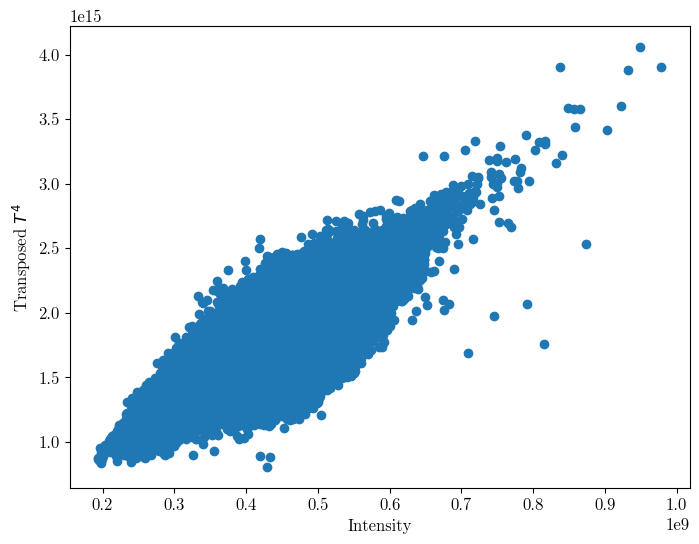

In [16]:
fig = plt.figure(figsize = (8,6))
plt.scatter(cubeM, Temp1.T)
plt.xlabel("Intensity")
plt.ylabel("Transposed $T^4$")
#plt.show()
plt.savefig("TempInte.png", dpi = 300)


In [17]:
Vx_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data
Vy_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data

In [18]:
Vx_T = fits.open("pyFLCT_fwhm_1200_dt_30_T_tracked.fits")[0].data
Vy_T = fits.open("pyFLCT_fwhm_1200_dt_30_T_tracked.fits")[1].data

In [19]:
Vx_T4 = fits.open("pyFLCT_fwhm_1200_dt_30_TTTT_tracked.fits")[0].data
Vy_T4 = fits.open("pyFLCT_fwhm_1200_dt_30_TTTT_tracked.fits")[1].data

In [20]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [21]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

<h2>Comparing velocities derived from T and from I</h2>

In [22]:
Vx_FLCT_1200 = temporal_avg(Vx_1200, 0, 90)
Vy_FLCT_1200 = temporal_avg(Vy_1200, 0, 90)

In [23]:
Vx_FLCT_T = temporal_avg(Vx_T, 0, 90)
Vy_FLCT_T = temporal_avg(Vy_T, 0, 90)

In [24]:
Vx_FLCT_T4 = temporal_avg(Vx_T4, 0, 90)
Vy_FLCT_T4 = temporal_avg(Vy_T4, 0, 90)

In [26]:
from scipy.ndimage import gaussian_filter

In [28]:
Vx_mean_sim = temporal_avg(Vx, 0, 90)
Vx_mean_sim = Vx_mean_sim/1E5

Vy_mean_sim = temporal_avg(Vy, 0, 90)
Vy_mean_sim = Vy_mean_sim/1E5

In [29]:
Vx_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

In [32]:
r_x_T = pearsonr(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
print(r_x_T)

PearsonRResult(statistic=0.9889559574670713, pvalue=0.0)


In [33]:
r_y_T = pearsonr(Vy_FLCT_1200.flatten(), Vy_FLCT_T.flatten())
print(r_y_T)

PearsonRResult(statistic=0.9874538169023748, pvalue=0.0)


In [34]:
r_x_T4 = pearsonr(Vx_FLCT_1200.flatten(), Vx_FLCT_T4.flatten())
print(r_x_T4)

PearsonRResult(statistic=0.9821684637475001, pvalue=0.0)


In [35]:
r_y_T4 = pearsonr(Vy_FLCT_1200.flatten(), Vy_FLCT_T4.flatten())
print(r_y_T4)

PearsonRResult(statistic=0.9843871960205934, pvalue=0.0)


In [64]:
from scipy.stats import linregress

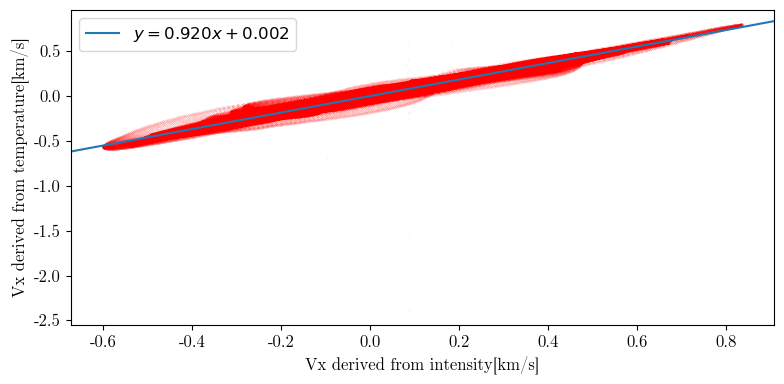

In [75]:
plt.figure(figsize = (8,4))
#niz = [r_x_T[0], r_x_T4[0]]
#niz2 = [np.mean(Vx_FLCT_T), np.mean(Vx_FLCT_T4)]
#plt.suptitle("Promena koeficijenta pravca u zavisnosti od vrednosti FHWM")
plt.scatter(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten(),  s = 0.001, color = "red")
plt.ylabel("Vx derived from temperature[km/s]")
plt.xlabel("Vx derived from intensity[km/s]")
m1, b1, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
plt.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
plt.legend()
plt.tight_layout()
plt.savefig("Inte_T_T4.png", bbox_inches = 'tight', dpi = 300)

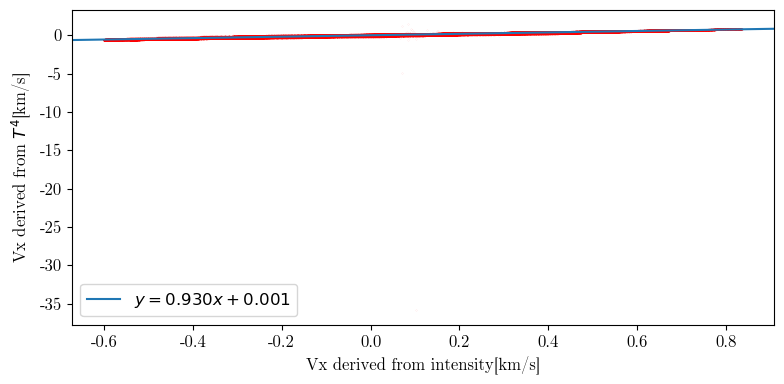

In [76]:
plt.figure(figsize = (8,4))
#niz = [r_x_T[0], r_x_T4[0]]
#niz2 = [np.mean(Vx_FLCT_T), np.mean(Vx_FLCT_T4)]
#plt.suptitle("Promena koeficijenta pravca u zavisnosti od vrednosti FHWM")
plt.scatter(Vx_FLCT_1200.flatten(), Vx_FLCT_T4.flatten(),  s = 0.001, color = "red")
plt.ylabel("Vx derived from $T^4$[km/s]")
plt.xlabel("Vx derived from intensity[km/s]")
m2, b2, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T4.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'$y = {m2:.3f}x {b2:+.3f}$')
plt.legend()
plt.tight_layout()
plt.savefig("Inte_T4.png", bbox_inches = 'tight', dpi = 300)

In [52]:
print(Vx_FLCT_T)

[[0.03948554 0.03983551 0.04022774 ... 0.08085405 0.07911205 0.07740853]
 [0.03998239 0.04035545 0.04063945 ... 0.08178914 0.08003271 0.07831505]
 [0.04084606 0.04111045 0.0413718  ... 0.08303195 0.08097436 0.07924224]
 ...
 [0.01872407 0.01869653 0.01868065 ... 0.05557862 0.05435003 0.05316263]
 [0.01921944 0.01919789 0.01918824 ... 0.05575648 0.05452364 0.05333223]
 [0.01970726 0.01969186 0.01968858 ... 0.05593137 0.0546945  0.0534993 ]]


In [53]:
print(Vx_FLCT_1200)

[[0.03207128 0.03222256 0.03239388 ... 0.07518646 0.07368383 0.07222118]
 [0.0323468  0.03250668 0.03265986 ... 0.07595438 0.07443126 0.07294863]
 [0.03262721 0.03280133 0.03289186 ... 0.07676471 0.07519193 0.07367443]
 ...
 [0.01881127 0.018999   0.01920757 ... 0.05495025 0.05370469 0.05249563]
 [0.01918508 0.01937777 0.01959145 ... 0.05517506 0.05392509 0.05271166]
 [0.01955497 0.01975274 0.01997167 ... 0.05538862 0.05413451 0.05291697]]


<h2>FLCT T, T<sup>4</sup>, Intensity vs Simulation velocities</h2>

In [44]:
r_x_Tvsim = pearsonr(Vx_FLCT_T.flatten(), Vx_filtered35.flatten())
print(r_x_Tvsim)

PearsonRResult(statistic=0.9356094750300644, pvalue=0.0)


In [45]:
r_y_Tvsim = pearsonr(Vy_FLCT_T.flatten(), Vy_filtered35.flatten())
print(r_y_Tvsim)

PearsonRResult(statistic=0.9321660481990177, pvalue=0.0)


In [50]:
r_x_T4vsim = pearsonr(Vx_FLCT_T4.flatten(), Vx_filtered35.flatten())
print(r_x_T4vsim)

PearsonRResult(statistic=0.9276167680542453, pvalue=0.0)


In [51]:
r_y_T4vsim = pearsonr(Vy_FLCT_T4.flatten(), Vy_filtered35.flatten())
print(r_y_T4vsim)

PearsonRResult(statistic=0.9269589803794681, pvalue=0.0)


In [56]:
r_x_Ivssim = pearsonr(Vx_FLCT_1200.flatten(), Vx_filtered35.flatten())
print(r_x_Ivssim)

PearsonRResult(statistic=0.9403599475124971, pvalue=0.0)


In [57]:
r_y_Ivssim = pearsonr(Vy_FLCT_1200.flatten(), Vy_filtered35.flatten())
print(r_y_Ivssim)

PearsonRResult(statistic=0.9311753322376419, pvalue=0.0)


In [62]:
r_x_TT = pearsonr(Vx_FLCT_T.flatten(), Vx_FLCT_T4.flatten())
print(r_x_TT)

PearsonRResult(statistic=0.9928792211571189, pvalue=0.0)


In [77]:
mT, bT, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_T.flatten())
mT4, bT4, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_T4.flatten())
mI, bI, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_1200.flatten())

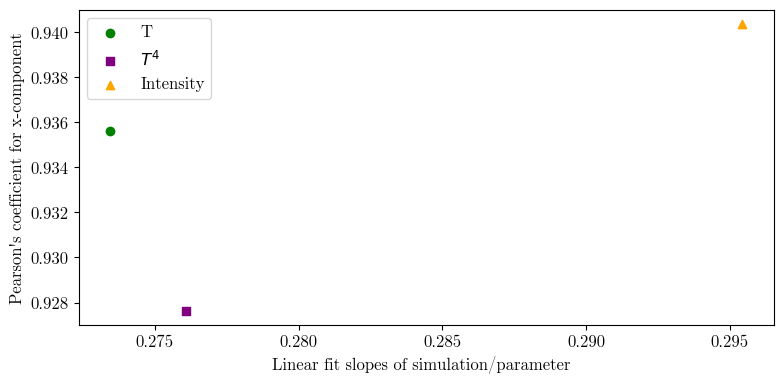

In [85]:
plt.figure(figsize = (8,4))
niz = [r_x_Tvsim[0], r_x_T4vsim[0], r_x_Ivssim[0]]
niz2 = [mT, mT4, mI]
marker_styles = ['o', 's', '^']
colors = ['green', 'purple', 'orange']
#plt.suptitle("Promena koeficijenta pravca u zavisnosti od vrednosti FHWM")
plt.scatter(niz2[0], niz[0], marker=marker_styles[0], c=colors[0], label=f'T')
plt.scatter(niz2[1], niz[1], marker=marker_styles[1], c=colors[1], label=f'$T^4$')
plt.scatter(niz2[2], niz[2], marker=marker_styles[2], c=colors[2], label=f'Intensity')
plt.ylabel("Pearson's coefficient for x-component")
plt.xlabel("Linear fit slopes of simulation/parameter  ")
plt.tight_layout()
plt.legend()
plt.savefig("Real_vs_derivedT.png", bbox_inches = 'tight', dpi = 300)